# WeatherPy
---
### As part of this activity, created a Python script to visualize the weather of over 500 cities of varying distances from the equator. 

**-- Created series of scatter plots to Showcase the Relationship Between Weather Variables and Latitude--**
    *   Latitude vs. Temperature
    *   Latitude vs. Humidity
    *   Latitude vs. Cloudiness
    *   Latitude vs. Wind Speed

**--- Compute Linear Regression for Each Relationship--**
* Computed the linear regression for each relationship and created series of scatter plots and including the model's formula, and the r values in each plot
    *   Northern Hemisphere: Temperature vs. Latitude
    *   Southern Hemisphere: Temperature vs. Latitude
    *   Northern Hemisphere: Humidity vs. Latitude
    *   Southern Hemisphere: Humidity vs. Latitude
    *   Northern Hemisphere: Cloudiness vs. Latitude
    *   Southern Hemisphere: Cloudiness vs. Latitude
    *   Northern Hemisphere: Wind Speed vs. Latitude
    *   Southern Hemisphere: Wind Speed vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import  pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        #pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eyl
Processing Record 2 of Set 1 | bezhetsk
Processing Record 3 of Set 1 | naqadeh
Processing Record 4 of Set 1 | kilemary
Processing Record 5 of Set 1 | jalu
Processing Record 6 of Set 1 | vila
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | perevolotskiy
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | myrtle beach
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | boyolangu
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | boa vista
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | tolaga bay
Processing Record 20 of Set 1 | luba
Processing Record 21 of Set 1 | georgetown
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,eyl,7.9803,49.8164,27.33,76,100,3.39,SO,1681355748
1,bezhetsk,57.7851,36.6965,4.18,91,79,5.18,RU,1681355748
2,naqadeh,36.9553,45.3880,7.55,78,45,2.94,IR,1681355748
3,kilemary,56.7783,46.8659,5.18,66,18,2.26,RU,1681355748
4,jalu,29.0331,21.5482,13.91,40,0,1.24,LY,1681355749


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,eyl,7.9803,49.8164,27.33,76,100,3.39,SO,1681355748
1,bezhetsk,57.7851,36.6965,4.18,91,79,5.18,RU,1681355748
2,naqadeh,36.9553,45.3880,7.55,78,45,2.94,IR,1681355748
3,kilemary,56.7783,46.8659,5.18,66,18,2.26,RU,1681355748
4,jalu,29.0331,21.5482,13.91,40,0,1.24,LY,1681355749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

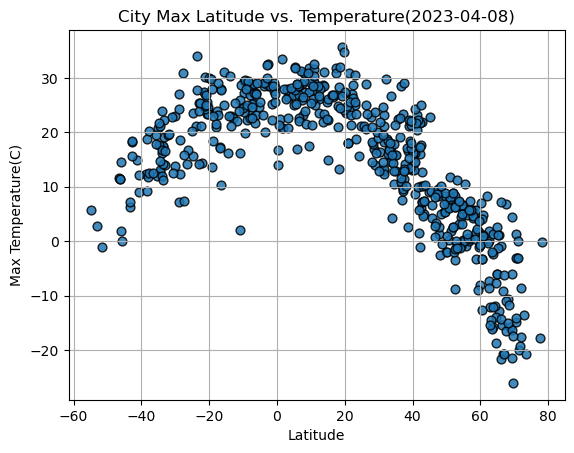

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Max Latitude vs. Temperature(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

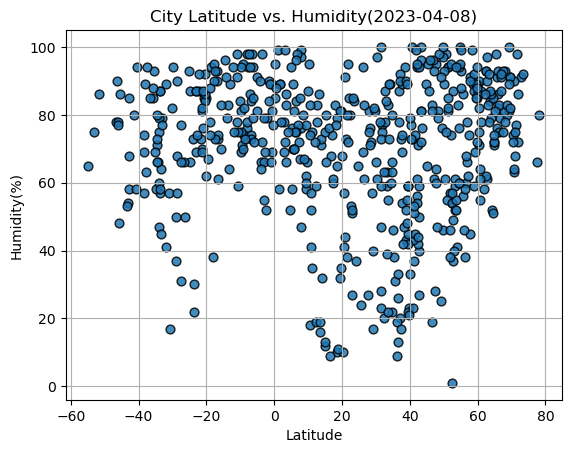

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Humidity(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

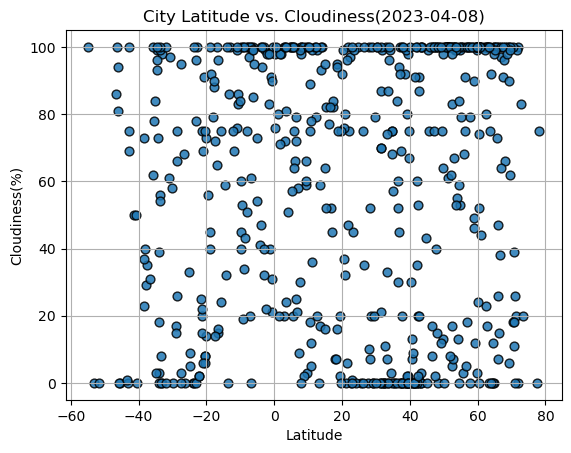

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Cloudiness(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

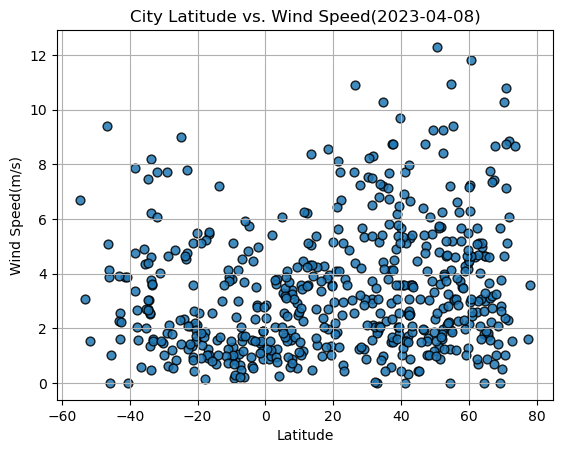

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Wind Speed(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Ref: Module6 - Day 2 - Activities\07-Stu_Weather_Stats

# Define a function to create Linear Regression plots
def CreateLinearRegressionPlotwithLat(dataFrame,yaxis_colName):
    
    #Get the latitute from the dataframe
    latitude = dataFrame['Lat']

    # Calculate the linear regression model 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, 
                                                            dataFrame[yaxis_colName])
    # Get regression values
    regress_values = latitude * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Generating scatter plot
    plt.scatter(latitude, dataFrame[yaxis_colName], s=40,edgecolors='black',alpha=.85)
    plt.plot(latitude,regress_values,"r-")

    #-- Set axis lable for the scatter plot
    plt.xlabel("Latitude")
    plt.ylabel(yaxis_colName)

    # annotate the line equation
    # For clear visiblity model's formula is displayed at the left top corner of the plot
    # Ref: https://matplotlib.org/1.5.3/users/annotations_intro.html
    plt.annotate(line_eq,xy=(0, 1), xycoords='figure fraction',fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.query('Lat >= 0'))

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,eyl,7.9803,49.8164,27.33,76,100,3.39,SO,1681355748
1,bezhetsk,57.7851,36.6965,4.18,91,79,5.18,RU,1681355748
2,naqadeh,36.9553,45.3880,7.55,78,45,2.94,IR,1681355748
3,kilemary,56.7783,46.8659,5.18,66,18,2.26,RU,1681355748
4,jalu,29.0331,21.5482,13.91,40,0,1.24,LY,1681355749


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.query('Lat < 0'))

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,hermanus,-34.4187,19.2345,12.67,66,73,3.05,ZA,1681355081
9,bluff,-46.6000,168.3333,11.56,78,86,9.39,NZ,1681355749
13,ushuaia,-54.8000,-68.3000,5.81,65,100,6.69,AR,1681355733
14,boyolangu,-8.1181,111.8935,28.45,76,100,3.01,ID,1681355750
16,tolaga bay,-38.3667,178.3000,18.77,74,23,4.74,NZ,1681355133


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7744887480530654


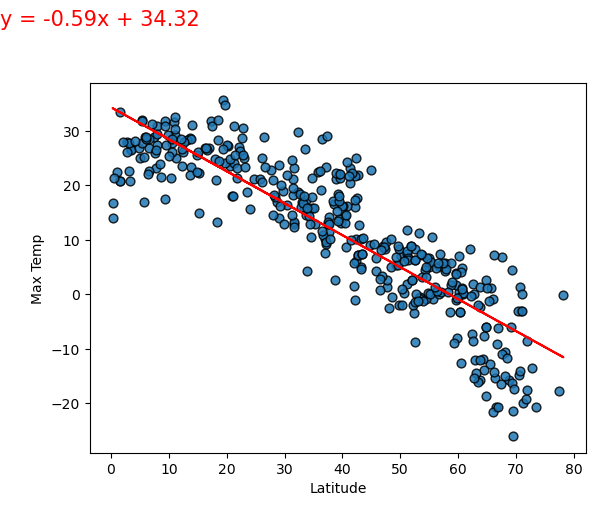

In [15]:
# Linear regression on Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Max Temp')

The r-value is: 0.5183689708798317


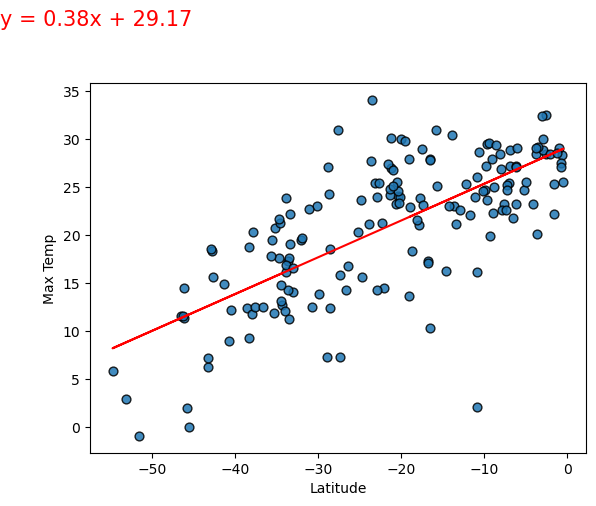

In [16]:
# Linear regression on Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Max Temp')

**Discussion about the linear relationship:** Max Temp vs Latitude<br>
 * Based on the R-value for Northern and Southern hemisphere, Northern hemisphere has strong co-relation between Max Temp and Latitude when compared to southern hemisphere which has moderate co-relation between Max Temp and Latitude. 
 * Also based on this Max Temp vs Latitude relationship it is evident that the closer to the Latitude 0 Max temperature increases whereas when moved away from the latitude 0 the temperature gets decreased.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.032313276367199856


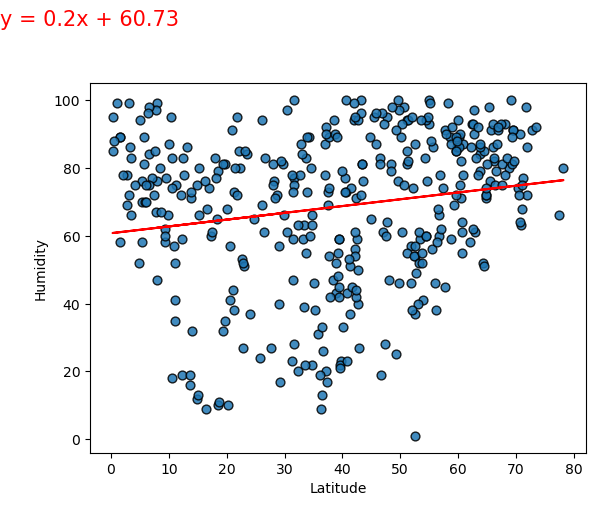

In [17]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Humidity')

The r-value is: 0.05471770534317657


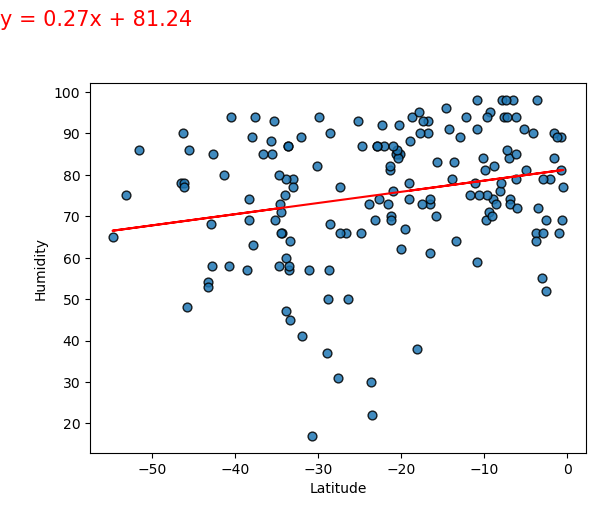

In [18]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Humidity')

**Discussion about the linear relationship:** Humidity vs Latitude<br>
* Based on the R-value for Northern and Southern hemisphere, both the hemisphere has very week co-relation between Humidity and Latitude
* Based on linear relationship despite having weaker co-relation, it is evident that Norther hemisphere data is densely populated when compared to southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002172595636362657


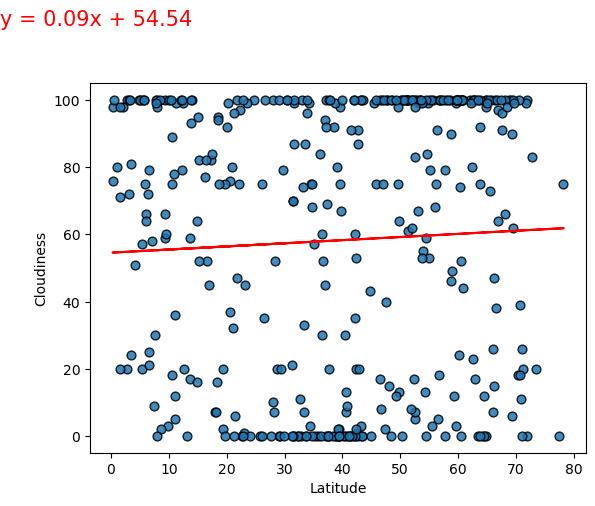

In [19]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Cloudiness')

The r-value is: 0.06025431746680828


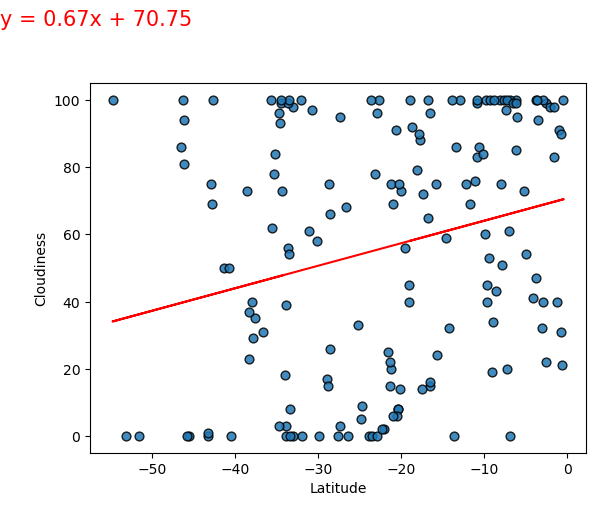

In [20]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Cloudiness')

**Discussion about the linear relationship:** Cloudiness vs Latitude<br>
* Based on the R-value for Northern and Southern hemisphere, both the hemisphere has very week co-relation between Cloudiness and Latitude
* Based on linear relationship despite having weaker co-relation, it is evident that Northern hemisphere data is densely populated either at 100% or 0 percent cloudiness when compared to southern hemisphere


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02273791092180575


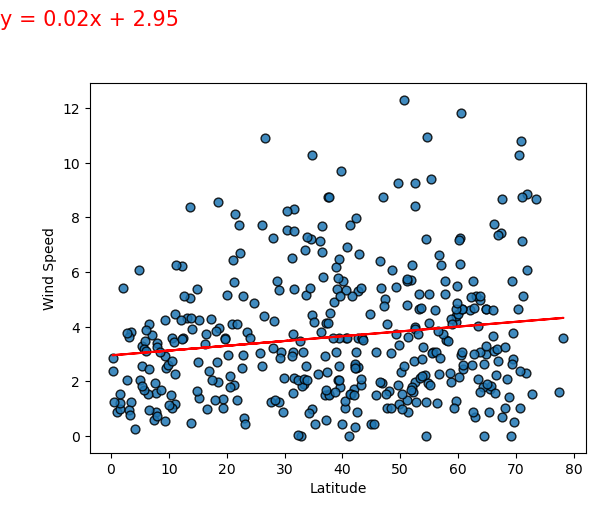

In [21]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Wind Speed')

The r-value is: 0.06249509053952116


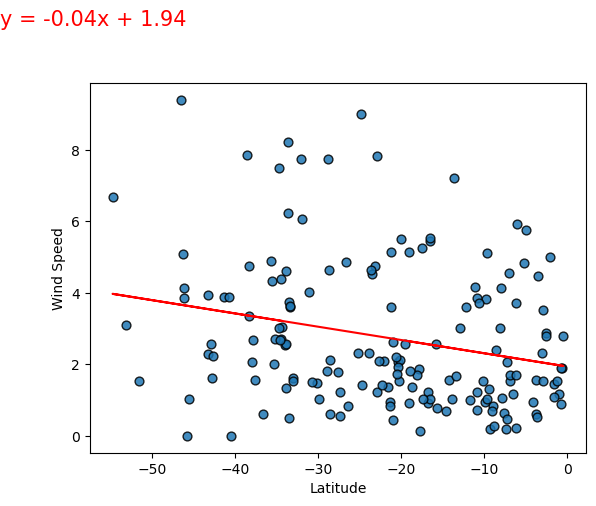

In [22]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Wind Speed')

**Discussion about the linear relationship:** Wind Speed vs Latitude<br>
* Based on the R-value for Northern and Southern hemisphere, both the hemisphere has very week co-relation between Wind speed and Latitude
* Based on linear relationship despite having weaker co-relation, it is evident that Northern hemisphere data is densely populated when compared to southern hemisphere and for both northern and souther hemisphere, most of the data have wind speed below 4 percent 